Run this before starting Jupyter Notebook: export LAL_DEBUG_LEVEL=4

    -Gives all EOB related error messages in terminal.

In [1]:
%pylab inline

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import scipy.interpolate as interpolate
import scipy.integrate as integrate
import scipy.optimize as optimize

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys

In [3]:
import matplotlib
matplotlib.__version__

'2.0.0rc1'

In [4]:
sys.path.insert(0, '../src')

import waveform as wave
import waveformset as ws
import trainingset as train
import taylorf2 as f2
import gaussianprocessregression as gpr
import pycbcwaveform as pycbcwave
import lalwaveform
import plotparams
import greedy
import empiricalinterpolation as eim
import surrogate
import diagnostics

import imp
imp.reload(wave)
imp.reload(ws)
imp.reload(train)
imp.reload(f2)
imp.reload(gpr)
imp.reload(pycbcwave)
imp.reload(lalwaveform)
imp.reload(greedy)
imp.reload(eim)
imp.reload(surrogate)
imp.reload(diagnostics)

import constants
imp.reload(constants)
from constants import *

In [5]:
from lalwaveform import dimensionless_fd_waveform
from lalwaveform import dimensionless_td_waveform

In [6]:
import pycbc.waveform
import lalsimulation
import lal

In [7]:
#lalwaveform.print_all_approximants()
lalwaveform.print_td_approximants()
#print_fd_approximants()

0 TaylorT1
1 TaylorT2
2 TaylorT3
15 SpinTaylorT1
16 SpinTaylorT2
18 SpinTaylorT4
23 PhenSpinTaylor
24 PhenSpinTaylorRD
36 EOBNRv2
37 EOBNRv2HM
40 TEOBResum_ROM
41 SEOBNRv1
42 SEOBNRv2
43 SEOBNRv2_opt
44 SEOBNRv3
45 SEOBNRv3_pert
46 SEOBNRv3_opt
47 SEOBNRv3_opt_rk4
48 SEOBNRv4
49 SEOBNRv4_opt
50 TEOBv2
51 TEOBv4
59 HGimri
60 IMRPhenomA
61 IMRPhenomB
64 IMRPhenomC
65 IMRPhenomD
67 IMRPhenomPv2
69 TaylorEt
70 TaylorT4
71 EccentricTD
75 SpinDominatedWf
76 NR_hdf5
78 NRSur7dq2


In [8]:
# def spin_tidal_eob(m1, m2, s1z, s2z, lambda1, lambda2, 
#                    distance, inclination, f_min, delta_t, 
#                    approximant='TEOBv4', verbose=True):
#     """EOB waveform with aligned spin and tidal interactions. 
#     l=3 tidal interaction and l=2,3 f-mode calculated with universal relations.
    
#     Parameters
#     ----------
#     approximant : 'TEOBv2' or 'TEOBv4'
#         Based on the inspiral model given by 'SEOBNRv2' or 'SEOBNRv4'.
    
#     Returns
#     -------
#     Waveform object
#     """
#     f_ref = 0.
#     phiRef = 0.
    
#     # Must have aligned spin
#     s1x, s1y, s2x, s2y = 0., 0., 0., 0.
    
#     # Eccentricity is not part of the model
#     longAscNodes = 0.
#     eccentricity = 0.
#     meanPerAno = 0.
    
#     # Set the EOB approximant
#     if (approximant not in ['TEOBv2', 'TEOBv4']):
#         raise Exception, "Approximant must be 'TEOBv2' or 'TEOBv4'."
#     lal_approx = lalsimulation.GetApproximantFromString(approximant)
    
    
#     # Calculate higher order matter effects from universal relations
#     # lambda3 given in terms of lambda2
#     lambda31_ur = lalsimulation.SimUniversalRelationlambda3TidalVSlambda2Tidal(lambda1)
#     lambda32_ur = lalsimulation.SimUniversalRelationlambda3TidalVSlambda2Tidal(lambda2)
#     # Omega2 given in terms of lambda2
#     omega21_ur = lalsimulation.SimUniversalRelationomega02TidalVSlambda2Tidal(lambda1)
#     omega22_ur = lalsimulation.SimUniversalRelationomega02TidalVSlambda2Tidal(lambda2)
#     # Omega3 given in terms of lambda3 (not lambda2)
#     omega31_ur = lalsimulation.SimUniversalRelationomega03TidalVSlambda3Tidal(lambda31_ur)
#     omega32_ur = lalsimulation.SimUniversalRelationomega03TidalVSlambda3Tidal(lambda32_ur)
    
#     # Insert matter parameters
#     lal_params = lal.CreateDict()
#     lalsimulation.SimInspiralWaveformParamsInsertTidalLambda1(lal_params, lambda1)
#     lalsimulation.SimInspiralWaveformParamsInsertTidalLambda2(lal_params, lambda2)
#     lalsimulation.SimInspiralWaveformParamsInsertTidalOctupolarLambda1(lal_params, lambda31_ur)
#     lalsimulation.SimInspiralWaveformParamsInsertTidalOctupolarLambda2(lal_params, lambda32_ur)
#     lalsimulation.SimInspiralWaveformParamsInsertTidalQuadrupolarFMode1(lal_params, omega21_ur)
#     lalsimulation.SimInspiralWaveformParamsInsertTidalQuadrupolarFMode2(lal_params, omega22_ur)
#     lalsimulation.SimInspiralWaveformParamsInsertTidalOctupolarFMode1(lal_params, omega31_ur)
#     lalsimulation.SimInspiralWaveformParamsInsertTidalOctupolarFMode2(lal_params, omega32_ur)
    
#     if verbose:
#         ap = lalsimulation.GetStringFromApproximant(lal_approx)
#         L2A = lalsimulation.SimInspiralWaveformParamsLookupTidalLambda1(lal_params)
#         L2B = lalsimulation.SimInspiralWaveformParamsLookupTidalLambda2(lal_params)
#         L3A = lalsimulation.SimInspiralWaveformParamsLookupTidalOctupolarLambda1(lal_params)
#         L3B = lalsimulation.SimInspiralWaveformParamsLookupTidalOctupolarLambda2(lal_params)
#         w2A = lalsimulation.SimInspiralWaveformParamsLookupTidalQuadrupolarFMode1(lal_params)
#         w2B = lalsimulation.SimInspiralWaveformParamsLookupTidalQuadrupolarFMode2(lal_params)
#         w3A = lalsimulation.SimInspiralWaveformParamsLookupTidalOctupolarFMode1(lal_params)
#         w3B = lalsimulation.SimInspiralWaveformParamsLookupTidalOctupolarFMode2(lal_params)
#         print 'Approximant: '+str(ap)
#         print 'm1={:.2f}, m2={:.2f}'.format(m1, m2)
#         print 's1z={:.2f}, s2z={:.2f}'.format(s1z, s2z)
#         print 'delta_t={:.6f}, 1/delta_t={:.5}, f_min={:.2f}'.format(delta_t, 1./delta_t, f_min)
#         print 'L2A, L2B, L3A, L3B, w2A, w2B, w3A, w3B:'
#         print '{:.1f}, {:.1f}, {:.1f}, {:.1f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}'.format(L2A, L2B, L3A, L3B, w2A, w2B, w3A, w3B)
#         sys.stdout.flush()
    
#     # Evaluate waveform
#     hp, hc = lalsimulation.SimInspiralChooseTDWaveform(
#         m1*MSUN_SI, m2*MSUN_SI, 
#         s1x, s1y, s1z, s2x, s2y, s2z, 
#         distance*MPC_SI,
#         inclination, phiRef, longAscNodes, eccentricity, meanPerAno, 
#         delta_t, f_min, f_ref, lal_params, lal_approx)
    
#     # Extract time array from lalsimulation's structures
#     tstart = hp.epoch.gpsSeconds + hp.epoch.gpsNanoSeconds*1.0e-9
#     ts = tstart + hp.deltaT*np.arange(hp.data.length)
    
#     return wave.Waveform.from_hp_hc(ts, hp.data.data, hc.data.data)

In [8]:
def spin_tidal_eob(m1, m2, s1z, s2z, lambda1, lambda2, 
                   distance, inclination, f_min, delta_t, 
                   approximant='TEOBv4', verbose=True):
    """EOB waveform with aligned spin and tidal interactions. 
    l=3 tidal interaction and l=2,3 f-mode calculated with universal relations.
    
    Parameters
    ----------
    approximant : 'TEOBv2' or 'TEOBv4'
        Based on the inspiral model given by 'SEOBNRv2' or 'SEOBNRv4'.
    
    Returns
    -------
    Waveform object
    """
    f_ref = 0.
    phiRef = 0.
    
    # Must have aligned spin
    s1x, s1y, s2x, s2y = 0., 0., 0., 0.
    
    # Eccentricity is not part of the model
    longAscNodes = 0.
    eccentricity = 0.
    meanPerAno = 0.
    
    # Set the EOB approximant
    if (approximant not in ['TEOBv2', 'TEOBv4']):
        raise Exception, "Approximant must be 'TEOBv2' or 'TEOBv4'."
    lal_approx = lalsimulation.GetApproximantFromString(approximant)
    
    # Insert matter parameters
    lal_params = lal.CreateDict()
    lalsimulation.SimInspiralWaveformParamsInsertTidalLambda1(lal_params, lambda1)
    lalsimulation.SimInspiralWaveformParamsInsertTidalLambda2(lal_params, lambda2)
    
    if verbose:
        ap = lalsimulation.GetStringFromApproximant(lal_approx)
        L2A = lalsimulation.SimInspiralWaveformParamsLookupTidalLambda1(lal_params)
        L2B = lalsimulation.SimInspiralWaveformParamsLookupTidalLambda2(lal_params)
        print 'Approximant: '+str(ap)
        print 'm1={:.2f}, m2={:.2f}'.format(m1, m2)
        print 's1z={:.2f}, s2z={:.2f}'.format(s1z, s2z)
        print 'delta_t={:.6f}, 1/delta_t={:.5}, f_min={:.2f}'.format(delta_t, 1./delta_t, f_min)
        print 'L2A, L2B:'
        print '{:.1f}, {:.1f}'.format(L2A, L2B)
    
    # Evaluate waveform
    hp, hc = lalsimulation.SimInspiralChooseTDWaveform(
        m1*MSUN_SI, m2*MSUN_SI, 
        s1x, s1y, s1z, s2x, s2y, s2z, 
        distance*MPC_SI,
        inclination, phiRef, longAscNodes, eccentricity, meanPerAno, 
        delta_t, f_min, f_ref, lal_params, lal_approx)
    
    # Extract time array from lalsimulation's structures
    tstart = hp.epoch.gpsSeconds + hp.epoch.gpsNanoSeconds*1.0e-9
    ts = tstart + hp.deltaT*np.arange(hp.data.length)
    
    return wave.Waveform.from_hp_hc(ts, hp.data.data, hc.data.data)

In [16]:
def lalsim_td_waveform_complex(long_asc_nodes=0.0, eccentricity=0.0, mean_per_ano=0.0,
                       phi_ref=0.0, f_ref=None,
                       phase_order=-1, amplitude_order=-1, spin_order=-1, tidal_order=-1, **p):
    """Wrapper for lalsimulation.SimInspiralChooseTDWaveform.
    Simplified version of pycbc.waveform.get_td_waveform wrapper.

    Parameters
    ----------
    f_ref : Reference frequency (?For setting phi_ref? Not sure.) Defaults to f_min.
    phi_ref : Reference phase (?at f_ref?).

    Returns
    -------
    h : Waveform
    """
    if f_ref==None:
        f_ref = p['f_min']

    # Set extra arguments in the lal Dict structure
    lal_pars = lal.CreateDict()
    if phase_order!=-1:
        lalsimulation.SimInspiralWaveformParamsInsertPNPhaseOrder(lal_pars, int(phase_order))
    if amplitude_order!=-1:
        lalsimulation.SimInspiralWaveformParamsInsertPNAmplitudeOrder(lal_pars, int(amplitude_order))
    if spin_order!=-1:
        lalsimulation.SimInspiralWaveformParamsInsertPNSpinOrder(lal_pars, int(spin_order))
    if tidal_order!=-1:
        lalsimulation.SimInspiralWaveformParamsInsertPNTidalOrder(lal_pars, int(tidal_order))
    if p['lambda1']:
        lalsimulation.SimInspiralWaveformParamsInsertTidalLambda1(lal_pars, p['lambda1'])
    if p['lambda2']:
        lalsimulation.SimInspiralWaveformParamsInsertTidalLambda2(lal_pars, p['lambda2'])


    # Set Approximant (C enum structure) corresponding to approximant string
    lal_approx = lalsimulation.GetApproximantFromString(p['approximant'])

    hp, hc = lalsimulation.SimInspiralChooseTDWaveform(
        float(MSUN_SI*p['mass1']),
        float(MSUN_SI*p['mass2']),
        float(p['spin1x']), float(p['spin1y']), float(p['spin1z']),
        float(p['spin2x']), float(p['spin2y']), float(p['spin2z']),
        float(MPC_SI*p['distance']), float(p['inclination']),
        float(phi_ref),
        float(long_asc_nodes), float(eccentricity), float(mean_per_ano),
        float(p['delta_t']), float(p['f_min']), float(f_ref),
        lal_pars, lal_approx)

    # Extract data from lalsimulation's structures
    tstart = hp.epoch.gpsSeconds+hp.epoch.gpsNanoSeconds*1.0e-9
    xs = tstart + hp.deltaT*np.arange(hp.data.length)
    return xs, hp.data.data, hc.data.data

# Test EOB version with time in s and mass in $M_\odot$

In [ ]:
q = 1.
m1=1.4
m2=q*m1
s1z = 0.3
s2z = 0.3
lambda1 = 4000
lambda2 = 4000
distance = 100.
inclination = 0.
f_min = 203.03
delta_t = 1./5.0756e+04
approximant = 'TEOBv4'

h1 = spin_tidal_eob(
    m1, m2, s1z, s2z, lambda1, lambda2, 
    distance, inclination, f_min, delta_t, 
    approximant=approximant)

h2 = lalwaveform.lalsim_td_waveform(
    approximant=approximant,
    mass1=m1, mass2=m2,
    spin1x=0, spin1y=0, spin1z=s1z,
    spin2x=0, spin2y=0, spin2z=s2z,
    lambda1=lambda1, lambda2=lambda2,
    distance=distance, inclination=inclination,
    delta_t=delta_t, f_min=f_min)

fig, axes = wave.plot_waveforms([h1, h2], npoints=10000)
fig, axes = wave.plot_waveforms([h1, h2], xi=h1.x[-1]-0.020, npoints=10000)

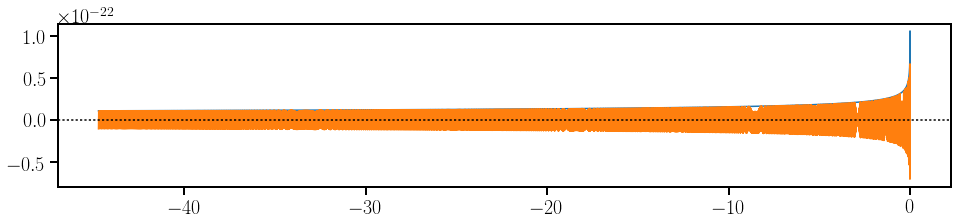

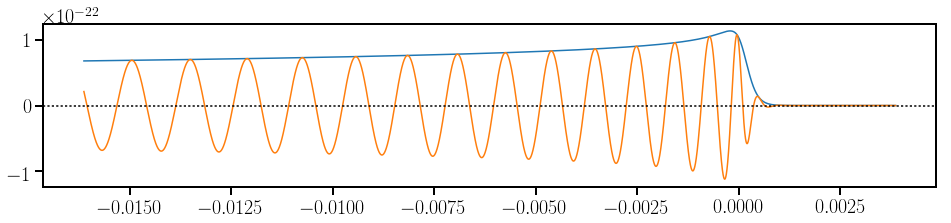

In [43]:
q, s1z, s2z, lambda1, lambda2 = [8.69049383e-01, 5.47094962e-02, 2.57813118e-01, 4.57160179e+02, 3.36913508e+03]

mtot = 2.0
m1=mtot/(1+q)
m2=q*m1

distance = 100.
inclination = 0.
f_min = 40.0
delta_t = 1.0/2.0**15
# delta_t = 1.0/2.0**16
approximant = 'TEOBv4'

h = lalwaveform.lalsim_td_waveform(
    approximant=approximant,
    mass1=m1, mass2=m2,
    spin1x=0, spin1y=0, spin1z=s1z,
    spin2x=0, spin2y=0, spin2z=s2z,
    lambda1=lambda1, lambda2=lambda2,
    distance=distance, inclination=inclination,
    delta_t=delta_t, f_min=f_min)

# t, hp, hc = lalsim_td_waveform_complex(
#     approximant=approximant,
#     mass1=m1, mass2=m2,
#     spin1x=0, spin1y=0, spin1z=s1z,
#     spin2x=0, spin2y=0, spin2z=s2z,
#     lambda1=lambda1, lambda2=lambda2,
#     distance=distance, inclination=inclination,
#     delta_t=delta_t, f_min=f_min)

fig, axes = wave.plot_waveforms([h], npoints=10000)
fig, axes = wave.plot_waveforms([h], xi=h.x[-1]-0.020, npoints=100000)

In [44]:
h.phase

array([ -3.11430505e+00,  -3.10663514e+00,  -3.09896523e+00, ...,
         1.79447772e+04,   1.79447772e+04,   1.79447772e+04])

In [23]:
q, s1z, s2z, lambda1, lambda2 = [5.59055118e-01, 3.81889764e-01, -2.71653543e-01, 3.93700787e+02, 8.26771654e+02]

mtot = 2.0
m1=mtot/(1+q)
m2=q*m1

distance = 100.
inclination = 0.
f_min = 40.0
#delta_t = 1.0/2.0**15
delta_t = 1.0/2.0**16
approximant = 'TEOBv4'

# h = lalwaveform.lalsim_td_waveform(
#     approximant=approximant,
#     mass1=m1, mass2=m2,
#     spin1x=0, spin1y=0, spin1z=s1z,
#     spin2x=0, spin2y=0, spin2z=s2z,
#     lambda1=lambda1, lambda2=lambda2,
#     distance=distance, inclination=inclination,
#     delta_t=delta_t, f_min=f_min)

t, hp, hc = lalsim_td_waveform_complex(
    approximant=approximant,
    mass1=m1, mass2=m2,
    spin1x=0, spin1y=0, spin1z=s1z,
    spin2x=0, spin2y=0, spin2z=s2z,
    lambda1=lambda1, lambda2=lambda2,
    distance=distance, inclination=inclination,
    delta_t=delta_t, f_min=f_min)

# fig, axes = wave.plot_waveforms([h], npoints=10000)
# fig, axes = wave.plot_waveforms([h], xi=h.x[-1]-0.020, npoints=100000)

In [27]:
delta_t = 1.0/2.0**14

t2, hp2, hc2 = lalsim_td_waveform_complex(
    approximant=approximant,
    mass1=m1, mass2=m2,
    spin1x=0, spin1y=0, spin1z=s1z,
    spin2x=0, spin2y=0, spin2z=s2z,
    lambda1=lambda1, lambda2=lambda2,
    distance=distance, inclination=inclination,
    delta_t=delta_t, f_min=f_min)

In [40]:
q, s1z, s2z, lambda1, lambda2 = [5.59055118e-01, 3.81889764e-01, -2.71653543e-01, 3.93700787e+02, 8.26771654e+02]

mtot = 2.0
m1=mtot/(1+q)
m2=q*m1

distance = 100.
inclination = 0.
f_min = 35.0
delta_t = 1.0/2.0**15
approximant = 'TEOBv4'

t, hp, hc = lalsim_td_waveform_complex(
    approximant=approximant,
    mass1=m1, mass2=m2,
    spin1x=0, spin1y=0, spin1z=s1z,
    spin2x=0, spin2y=0, spin2z=s2z,
    lambda1=lambda1, lambda2=lambda2,
    distance=distance, inclination=inclination,
    delta_t=delta_t, f_min=f_min)

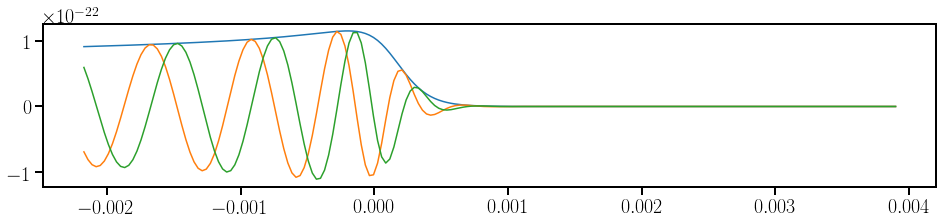

In [42]:
fig, axes = plt.subplots(figsize=(16, 3))
amp = np.sqrt(hp**2 + hc**2)
axes.plot(t[-200:], amp[-200:])
axes.plot(t[-200:], hp[-200:])
axes.plot(t[-200:], hc[-200:])

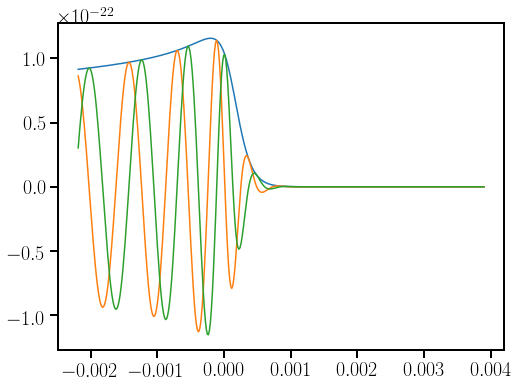

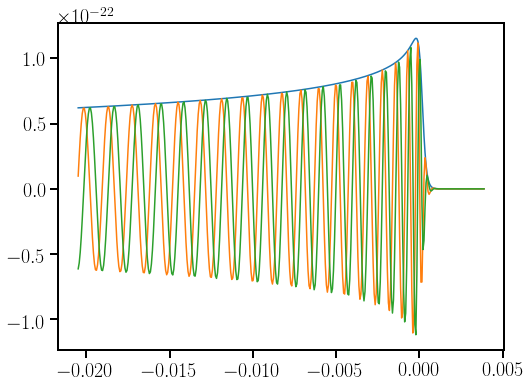

In [29]:
fig, axes = plt.subplots()
amp = np.sqrt(hp**2 + hc**2)
axes.plot(t[-400:], amp[-400:])
axes.plot(t[-400:], hp[-400:])
axes.plot(t[-400:], hc[-400:])

fig, axes = plt.subplots()
amp2 = np.sqrt(hp2**2 + hc2**2)
axes.plot(t2[-400:], amp2[-400:])
axes.plot(t2[-400:], hp2[-400:])
axes.plot(t2[-400:], hc2[-400:])

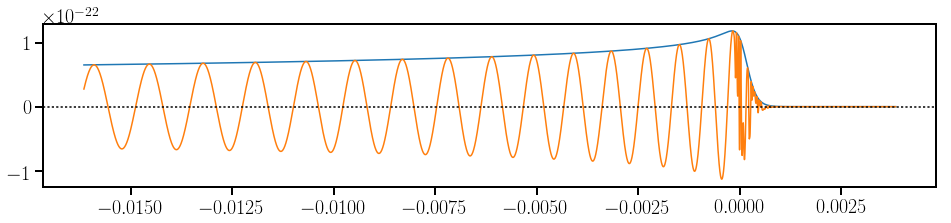

In [21]:
h = wave.Waveform.from_hp_hc(t, hp, hc)
fig, axes = wave.plot_waveforms([h], xi=h.x[-1]-0.020, npoints=10000)

In [11]:
filename = '../data/TEOBv4_40hz/TEOB_TD_42_raw.npy'
hraw = np.load(filename)

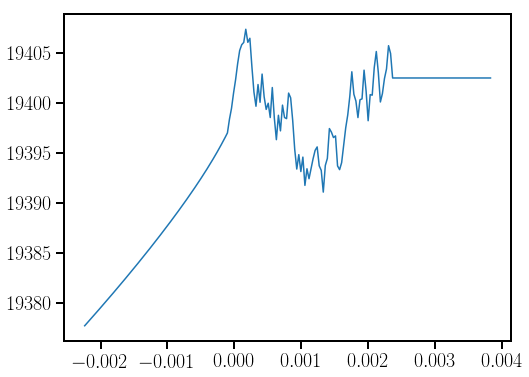

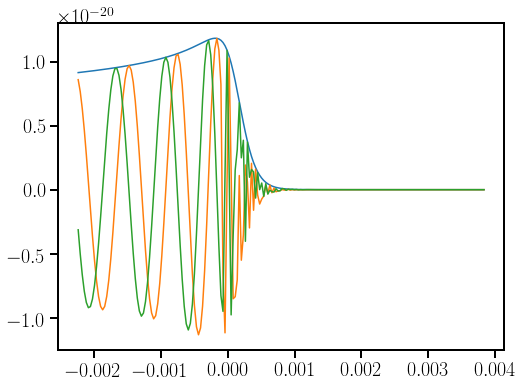

In [14]:
time, phase, amp = hraw
hp = amp*np.cos(phase)
hc = amp*np.sin(phase)

fig, axes = plt.subplots()
axes.plot(time[-200:], -phase[-200:])

fig, axes = plt.subplots()
axes.plot(time[-200:], amp[-200:])
axes.plot(time[-200:], hp[-200:])
axes.plot(time[-200:], hc[-200:])

# Test the $2^5$ corners of parameter space

In [18]:
def uniform_grid(n, limits):
    """This is really stupid.
    """
    points = []
    for i in range(n):
        xmin, xmax = limits[0, 0], limits[0, 1]
        x0 = np.linspace(xmin, xmax, n)
        for j in range(n):
            xmin, xmax = limits[1, 0], limits[1, 1]
            x1 = np.linspace(xmin, xmax, n)
            for k in range(n):
                xmin, xmax = limits[2, 0], limits[2, 1]
                x2 = np.linspace(xmin, xmax, n)
                for l in range(n):
                    xmin, xmax = limits[3, 0], limits[3, 1]
                    x3 = np.linspace(xmin, xmax, n)
                    for m in range(n):
                        xmin, xmax = limits[4, 0], limits[4, 1]
                        x4 = np.linspace(xmin, xmax, n)
                        
                        point = [x0[i], x1[j], x2[k], x3[l], x4[m]]
                        #print point
                        points.append(point)
    #print points
    return np.array(points)

In [19]:
# Parameters for the training set
limits = np.array([[1.0/3.0, 1.0], [-0.5, 0.5], [-0.5, 0.5], [0.0, 5000], [0.0, 5000]])
corners = uniform_grid(2, limits)

In [30]:
mf_min = 0.002
delta_tbym = 2.0
approximant = 'TEOBv4'

h_list = []
for p in corners:
    print p
    q, s1, s2, lambda1, lambda2 = p

    hdim = lalwaveform.dimensionless_td_waveform(q=q, spin1z=s1, spin2z=s2, 
                                 lambda1=lambda1, lambda2=lambda2, 
                                 mf_min=mf_min, delta_tbym=delta_tbym, 
                                 approximant=approximant)
    h_list.append(hdim)
    #fig, axes = wave.plot_waveforms(h_list, npoints=10000)

[ 0.33333333 -0.5        -0.5         0.          0.        ]
[  3.33333333e-01  -5.00000000e-01  -5.00000000e-01   0.00000000e+00
   5.00000000e+03]
[  3.33333333e-01  -5.00000000e-01  -5.00000000e-01   5.00000000e+03
   0.00000000e+00]
[  3.33333333e-01  -5.00000000e-01  -5.00000000e-01   5.00000000e+03
   5.00000000e+03]
[ 0.33333333 -0.5         0.5         0.          0.        ]
[  3.33333333e-01  -5.00000000e-01   5.00000000e-01   0.00000000e+00
   5.00000000e+03]
[  3.33333333e-01  -5.00000000e-01   5.00000000e-01   5.00000000e+03
   0.00000000e+00]
[  3.33333333e-01  -5.00000000e-01   5.00000000e-01   5.00000000e+03
   5.00000000e+03]
[ 0.33333333  0.5        -0.5         0.          0.        ]
[  3.33333333e-01   5.00000000e-01  -5.00000000e-01   0.00000000e+00
   5.00000000e+03]
[  3.33333333e-01   5.00000000e-01  -5.00000000e-01   5.00000000e+03
   0.00000000e+00]
[  3.33333333e-01   5.00000000e-01  -5.00000000e-01   5.00000000e+03
   5.00000000e+03]
[ 0.33333333  0.5     

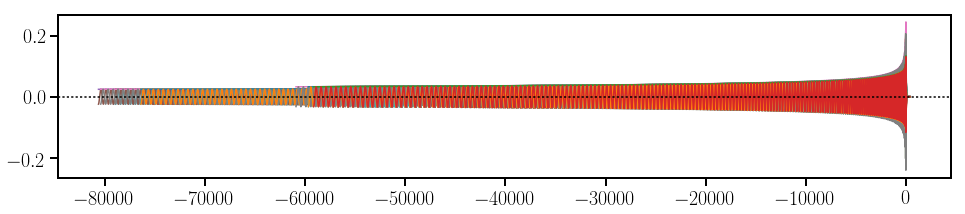

In [31]:
fig, axes = wave.plot_waveforms(h_list, npoints=10000)

# Compare TEOBv2 to TEOBv4

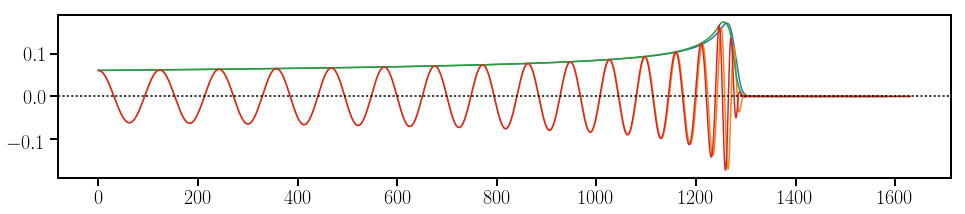

In [33]:
q = 1.0/3.0
s1z = -0.5
s2z = 0.5
lambda1 = 0.0
lambda2 = 0.0
mf_min = 0.008
delta_tbym = 10.0

approximant = 'TEOBv2'
hdim1 = lalwaveform.dimensionless_td_waveform(q=q, spin1z=s1z, spin2z=s2z, 
                                 lambda1=lambda1, lambda2=lambda2, 
                                 mf_min=mf_min, delta_tbym=delta_tbym, 
                                 approximant=approximant)

approximant = 'TEOBv4'
hdim2 = lalwaveform.dimensionless_td_waveform(q=q, spin1z=s1z, spin2z=s2z, 
                                 lambda1=lambda1, lambda2=lambda2, 
                                 mf_min=mf_min, delta_tbym=delta_tbym, 
                                 approximant=approximant)

# Align at initial conditions instead of at max frequency of Hamiltonian (or amplitude?)
hdim1.add_x(-hdim1.x[0])
hdim1.add_phase(remove_start_phase=True)
hdim2.add_x(-hdim2.x[0])
hdim2.add_phase(remove_start_phase=True)
fig, axes = wave.plot_waveforms([hdim1, hdim2], npoints=10000)

In [46]:
m1 =1.2*MSUN_SI
m2 = 1.4*MSUN_SI
chi1 = 0.4
chi2 = 0.2
lambda1 = 1000
lambda2 = 2000

lal_params = lal.CreateDict()
lalsimulation.SimInspiralWaveformParamsInsertTidalLambda1(lal_params, lambda1)
lalsimulation.SimInspiralWaveformParamsInsertTidalLambda2(lal_params, lambda2)

pnphase = lalsimulation.SimInspiralTaylorF2AlignedPhasing(m1, m2, chi1, chi2, lal_params)

In [52]:
print lalsimulation.SimInspiralWaveformParamsLookupTidalLambda1(lal_params)
print lalsimulation.SimInspiralWaveformParamsLookupTidalLambda2(lal_params)

1000.0
2000.0


In [47]:
pnphase.v

array([  0.09430804,   0.        ,   0.60666085,  -3.88020826,
         3.94761435,   7.87872222, -48.41162355, -24.72468176,
         0.        ,   0.        ,   0.        ,   0.        ,   0.        ])

In [48]:
pnphase.vlogv

array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,  23.63616667, -30.75340136,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,   0.        ])

In [49]:
pnphase.vlogvsq

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [ ]:
static REAL8 UNUSED
XLALSimInspiralTaylorF2Phasing_10PNTidalCoeff(
	REAL8 mByM /**< ratio of object mass to total mass */
    )
{
  return (-288. + 264.*mByM)*mByM*mByM*mByM*mByM;

}

static REAL8 UNUSED
XLALSimInspiralTaylorF2Phasing_12PNTidalCoeff(
	REAL8 mByM /**< ratio of object mass to total mass */
    )
{
  return (-15895./28. + 4595./28.*mByM + 5715./14.*mByM*mByM - 325./7.*mByM*mByM*mByM)*mByM*mByM*mByM*mByM;
}

# Test universal relations

In [34]:
l2 = 0.0
l3 = 0.0
print lalsimulation.SimUniversalRelationlambda3TidalVSlambda2Tidal(l2)
print lalsimulation.SimUniversalRelationomega02TidalVSlambda2Tidal(l2)
print lalsimulation.SimUniversalRelationomega03TidalVSlambda3Tidal(l3)

0.0
0.182
0.237899239


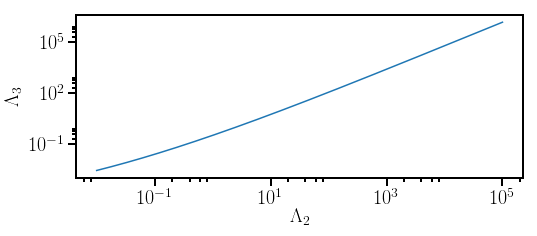

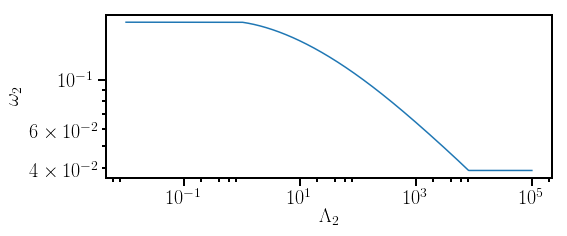

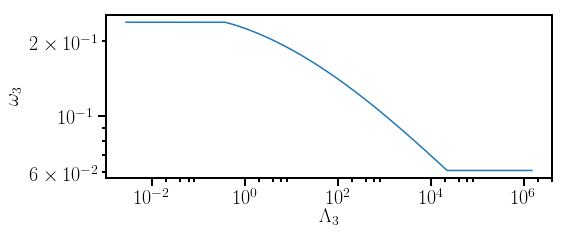

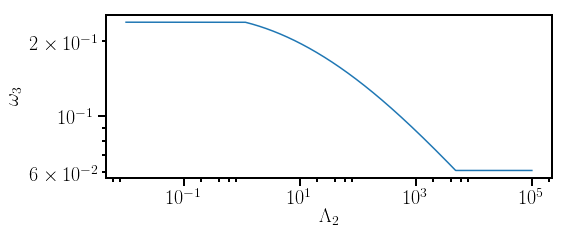

In [36]:
lambda2 = np.logspace(-2, 5, 1000)

lambda3 = [lalsimulation.SimUniversalRelationlambda3TidalVSlambda2Tidal(l2) for l2 in lambda2]
fig, axes = plt.subplots(figsize=(8, 3))
axes.plot(lambda2, lambda3)
axes.set_xscale('log')
axes.set_yscale('log')
axes.set_xlabel(r'$\Lambda_2$')
axes.set_ylabel(r'$\Lambda_3$')

omega2 = [lalsimulation.SimUniversalRelationomega02TidalVSlambda2Tidal(l2) for l2 in lambda2]
fig, axes = plt.subplots(figsize=(8, 3))
axes.plot(lambda2, omega2)
axes.set_xscale('log')
axes.set_yscale('log')
axes.set_xlabel(r'$\Lambda_2$')
axes.set_ylabel(r'$\omega_2$')

omega3 = [lalsimulation.SimUniversalRelationomega03TidalVSlambda3Tidal(l3) for l3 in lambda3]
fig, axes = plt.subplots(figsize=(8, 3))
axes.plot(lambda3, omega3)
axes.set_xscale('log')
axes.set_yscale('log')
axes.set_xlabel(r'$\Lambda_3$')
axes.set_ylabel(r'$\omega_3$')

fig, axes = plt.subplots(figsize=(8, 3))
axes.plot(lambda2, omega3)
axes.set_xscale('log')
axes.set_yscale('log')
axes.set_xlabel(r'$\Lambda_2$')
axes.set_ylabel(r'$\omega_3$')

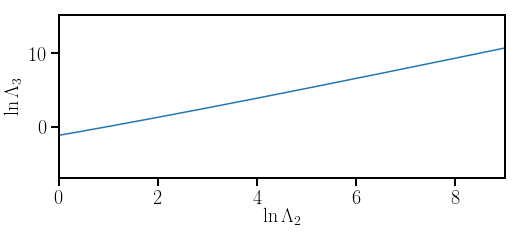

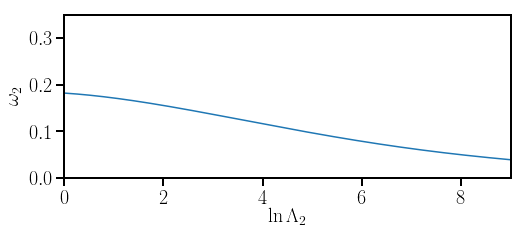

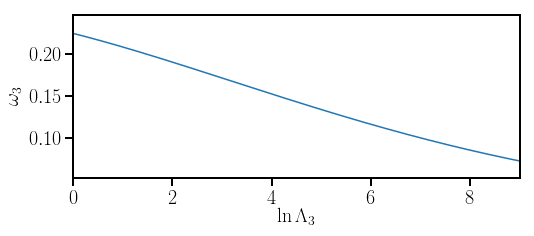

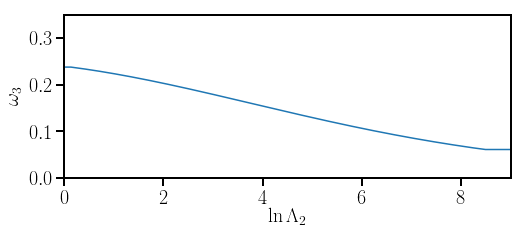

In [37]:
lambda3 = [lalsimulation.SimUniversalRelationlambda3TidalVSlambda2Tidal(l2) for l2 in lambda2]
fig, axes = plt.subplots(figsize=(8, 3))
axes.plot(np.log(lambda2), np.log(lambda3))
axes.set_xlim(0, 9)
axes.set_xlabel(r'$\ln\Lambda_2$')
axes.set_ylabel(r'$\ln\Lambda_3$')

omega2 = [lalsimulation.SimUniversalRelationomega02TidalVSlambda2Tidal(l2) for l2 in lambda2]
fig, axes = plt.subplots(figsize=(8, 3))
axes.plot(np.log(lambda2), omega2)
axes.set_xlim(0, 9)
axes.set_ylim(0, 0.35)
axes.set_xlabel(r'$\ln\Lambda_2$')
axes.set_ylabel(r'$\omega_2$')

omega3 = [lalsimulation.SimUniversalRelationomega03TidalVSlambda3Tidal(l3) for l3 in lambda3]
fig, axes = plt.subplots(figsize=(8, 3))
axes.plot(np.log(lambda3), omega3)
axes.set_xlim(0, 9)
axes.set_xlabel(r'$\ln\Lambda_3$')
axes.set_ylabel(r'$\omega_3$')

fig, axes = plt.subplots(figsize=(8, 3))
axes.plot(np.log(lambda2), omega3)
axes.set_xlim(0, 9)
axes.set_ylim(0, 0.35)
axes.set_xlabel(r'$\ln\Lambda_2$')
axes.set_ylabel(r'$\omega_3$')